<a href="https://colab.research.google.com/github/Anastasiya9323/DES/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt


In [2]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')


In [3]:
def target_function(x):
    return 2**x * torch.sin(2**-x)


In [4]:
def metric(pred, target):
       return (pred - target).abs().mean()


In [66]:
class RegressionNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
      
net = RegressionNet(40)          

In [ ]:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)


In [ ]:
x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)


In [67]:
optimizer = torch.optim.Adam(net.parameters(), lr= 0.1)    

In [68]:
def loss(pred, target):
    squares = abs(pred - target)
    return squares.mean()

In [84]:
for epoch_index in range(1800):                   
    optimizer.zero_grad()

    y_pred =net.forward(x_train)                                             
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()




0.019339630380272865


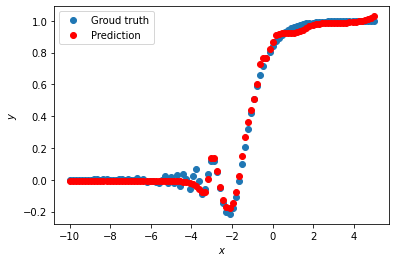

In [85]:
print(metric(net.forward(x_validation), y_validation).item())

predict(net, x_validation, y_validation)  
